# JURNAL MODUL 2 - EKUALISASI & SPESIFIKASI

### Import Library

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

Script diatas merupakan perintah import untuk meng impor library yang dibutuhkan pada program. Library yang digunakan diantaranya numpy yang berfungsi untuk memudahkan melakukakan perhitungan saintifik seperti matriks, matplotlib yang berfungsi untuk visualisasi data, dan cv2 atau openCV yang berfungsi untuk pemrosesan citra.

### Membaca dan Menampilkan Citra

Script dibawah ini digunakan untuk membaca dan menampilkan citra yang akan diproses seterusnya oleh program. "plt.imread" adalah fungsi yang digunakan untuk membaca citra dari file dengan cara menerima argumen path dari file yaitu "res/senheScramble.jpg" lalu citra disimpan pada variabel "image". "plt.imshow" adalah fungsi yang digunakan untuk menampilkan citra dalam skala abu-abu "cmap='gray'".

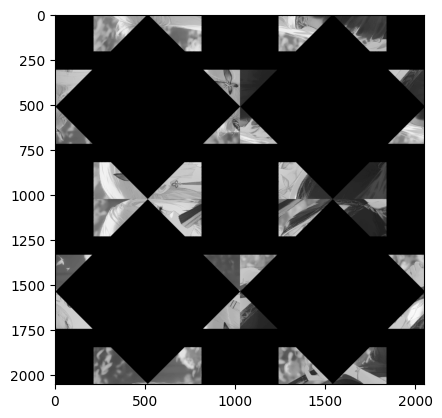

In [20]:
image = plt.imread("res/senheScramble.jpg")
plt.imshow(image, cmap='gray')

### Membuat Fungsi Rotasi

In [21]:
def rotation(image, deg=0):
    tinggi, lebar = image.shape
    rotate = np.zeros((tinggi,lebar))
    rad = deg*np.pi / 180      
    for i in range(tinggi):
        for j in range(lebar):
            x2 = int((i-tinggi/2) * np.cos(rad) - (j-lebar/2) * np.sin(rad) + tinggi/2)
            y2 = int((i-tinggi/2) * np.sin(rad) + (j-lebar/2) * np.cos(rad) + lebar/2)
            if (0 <= x2 <tinggi and 0 <= y2 < lebar):
                rotate[i,j] = image[x2,y2]
    return rotate

Script diatas digunakan untuk memutar citra dengan sudut tertentu. Fungsi ini menerima dua argumen, yaitu "image" yang berisi citra yang ingin diputar dan "deg" yang berisi sudut rotasi dalam derajat. Jika "deg" tidak disediakan, maka nilai defaultnya adalah 0 derajat. Fungsi ini pertama-tama menghitung tinggi dan lebar citra menggunakan atribut "shape" dari citra. Kemudian, fungsi ini membuat citra baru dengan ukuran yang sama dengan citra asli, tetapi diisi dengan nol. Fungsi ini kemudian menghitung sudut rotasi dalam radian dan melakukan perulangan untuk setiap piksel dalam citra asli. Untuk setiap piksel, fungsi ini menghitung koordinat baru piksel setelah rotasi menggunakan rumus trigonometri. Jika koordinat baru masih berada di dalam batas citra, maka nilai piksel di koordinat baru akan disalin ke citra baru. Fungsi ini mengembalikan citra baru yang telah diputar.

### Membuat Fungsi Tanslasi

In [22]:
def translation(image, x=0, y=0):
    tinggi, lebar = image.shape
    result = np.zeros((tinggi, lebar))
    for i in range(tinggi):
        for j in range(lebar):
            result[i,j] = image[i-x,j-y]
                
    return result

Script diatas digunakan untuk menggeser citra dengan jarak tertentu. Fungsi ini menerima tiga argumen, yaitu "image" yang berisi citra yang ingin diterjemahkan, "x" yang berisi jarak geseran horizontal, dan "y" yang berisi jarak geseran vertikal. Jika "x" dan "y" tidak disediakan, maka nilai defaultnya adalah 0, yang berarti tidak ada geseran. Fungsi ini pertama-tama menghitung tinggi dan lebar citra menggunakan atribut "shape" dari citra. Kemudian, fungsi ini membuat citra baru dengan ukuran yang sama dengan citra asli, tetapi diisi dengan nol. Fungsi ini kemudian melakukan perulangan untuk setiap piksel dalam citra asli. Untuk setiap piksel, fungsi ini menggeser posisi piksel ke arah yang diinginkan dengan mengubah koordinat pikselnya. Jika koordinat baru masih berada di dalam batas citra, maka nilai piksel di koordinat baru akan disalin ke citra baru. Fungsi ini mengembalikan citra baru yang telah diterjemahkan.

### Membuat Fungsi Slice untuk Membagi Segmen Gambar

In [23]:
def sliced(img, rows, cols):
    img_sliced = []
    num_rows = len(rows) - 1
    num_cols = len(cols) - 1
    for i in range(num_rows):
        for j in range(num_cols):
            start_row = sum(rows[1:i+1])
            end_row = sum(rows[1:i+2])
            start_col = sum(cols[1:j+1])
            end_col = sum(cols[1:j+2])
            parts = img[start_row:end_row, start_col:end_col]
            img_sliced.append(parts)
    return img_sliced

Script diatas digunakan untuk untuk memotong citra menjadi beberapa bagian berdasarkan baris dan kolom yang ditentukan. Fungsi ini menerima tiga argumen, yaitu "img" yang berisi citra yang ingin dipotong, "rows" yang berisi daftar baris yang akan dipotong, dan "cols" yang berisi daftar kolom yang akan dipotong. Fungsi ini pertama-tama menghitung jumlah baris dan kolom yang akan dipotong, dan kemudian melakukan perulangan untuk setiap baris dan kolom. Untuk setiap baris dan kolom, fungsi ini menghitung posisi awal dan akhir baris dan kolom yang akan dipotong, dan kemudian memotong citra berdasarkan posisi tersebut. Fungsi ini mengembalikan daftar citra yang telah dipotong.

### Menampilkan Tinggi dan Lebar Citra

In [24]:
print("height = ", image.shape[0])
print("width = ", image.shape[1])

rows = [0, 1026, 1026] 
cols = [0, 1026, 1026]

height =  2052
width =  2052


Script diatas digunakan untuk menampilkan tinggi dan lebar citra, dan kemudian memotong citra menjadi beberapa bagian berdasarkan baris dan kolom yang ditentukan.

Kode pertama menampilkan tinggi dan lebar citra menggunakan atribut shape dari citra. Kode ini menampilkan tinggi citra di baris pertama dan lebar citra di baris kedua. Kode kedua mendefinisikan daftar baris dan kolom yang akan digunakan untuk memotong citra. Dalam contoh ini, citra akan dipotong menjadi tiga bagian berdasarkan baris dan kolom yang ditentukan.

Fungsi "sliced" yang didefinisikan sebelumnya dapat digunakan untuk memotong citra menjadi beberapa bagian berdasarkan baris dan kolom yang ditentukan

## 1. Menyusun Citra Menjadi Satu Gambar Utuh

### Memotong Citra Menjadi Beberapa Bagian

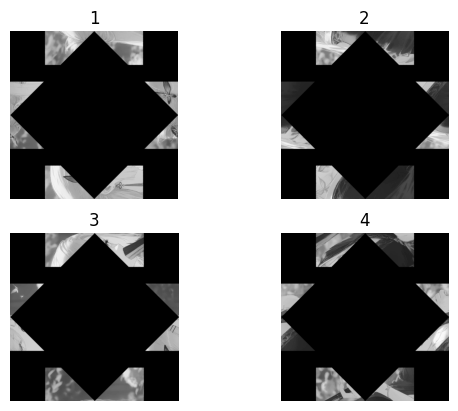

In [25]:
parts = sliced(image, rows, cols)
for i in range(len(parts)):
    plt.subplot(2, 2, i+1)
    plt.imshow(parts[i], cmap='gray')
    plt.title(i+1)
    plt.axis('off')
plt.show()

Script diatas menggunakan fungsi "sliced" untuk memotong gambar yang disimpan dalam variabel "image" menjadi beberapa bagian sesuai dengan batas-batas yang didefinisikan dalam list "rows" dan "cols". Kemudian, kode menggunakan loop "for" untuk mengiterasi setiap potongan gambar yang telah dibuat dan menampilkannya menggunakan subplot dari matplotlib. Dalam setiap iterasi, potongan gambar ditampilkan di subplot yang sesuai dengan nomor iterasi. Fungsi "plt.imshow()" digunakan untuk menampilkan gambar dalam mode skala abu-abu (cmap='gray'), dan "plt.title()" digunakan untuk memberikan judul berupa nomor potongan gambar. Fungsi "plt.axis('off')" digunakan untuk menghilangkan sumbu x dan y pada setiap subplot. Terakhir, fungsi "plt.show()" digunakan untuk menampilkan semua subplot yang telah diatur sebelumnya dalam satu tampilan. Dengan demikian, kode tersebut memungkinkan untuk melihat potongan-potongan gambar dari gambar utuh sesuai dengan batas-batas yang telah ditentukan sebelumnya.

### Proses Rotasi dan Translasi Citra

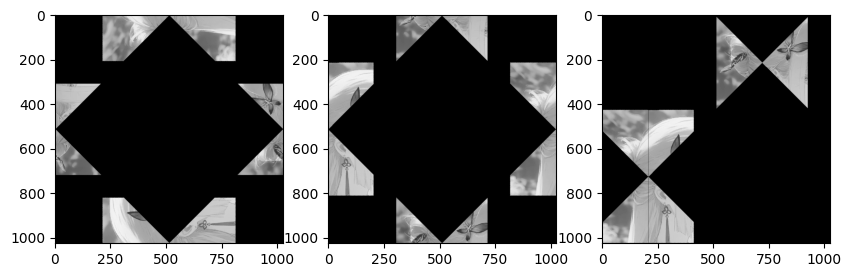

In [26]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
plt.imshow(parts[0], cmap='gray')
plt.subplot(1, 3, 2)
hasil_rotate = rotation(parts[0], 90)
plt.imshow(hasil_rotate, cmap='gray')
plt.subplot(1, 3, 3)
hasil_trans = translation(hasil_rotate, 213, 208)
plt.imshow(hasil_trans, cmap='gray')

Script diatas membuat sebuah figure matplotlib dengan ukuran 10x10 inci menggunakan "plt.figure(figsize=(10, 10))". Selanjutnya, kode menggunakan subplot untuk menampilkan tiga gambar secara berurutan dalam satu baris dengan tiga kolom. Pada subplot pertama (subplot(1, 3, 1)), ditampilkan gambar pertama dari list "parts" (index 0) dalam mode skala abu-abu (cmap='gray'). Pada subplot kedua (subplot(1, 3, 2)), dilakukan rotasi gambar pertama sebesar 90 derajat menggunakan fungsi "rotation", dan hasil rotasi tersebut ditampilkan dalam mode skala abu-abu. Pada subplot ketiga (subplot(1, 3, 3)), hasil rotasi sebelumnya diambil dan dilakukan translasi sebesar 213 piksel horizontal dan 208 piksel vertikal menggunakan fungsi "translation", dan hasil translasi tersebut ditampilkan dalam mode skala abu-abu. Kode tersebut mengilustrasikan proses transformasi gambar yang meliputi rotasi dan translasi, serta menampilkan hasilnya dalam satu tampilan yang terorganisir.

### Penggabungan Bagian Citra

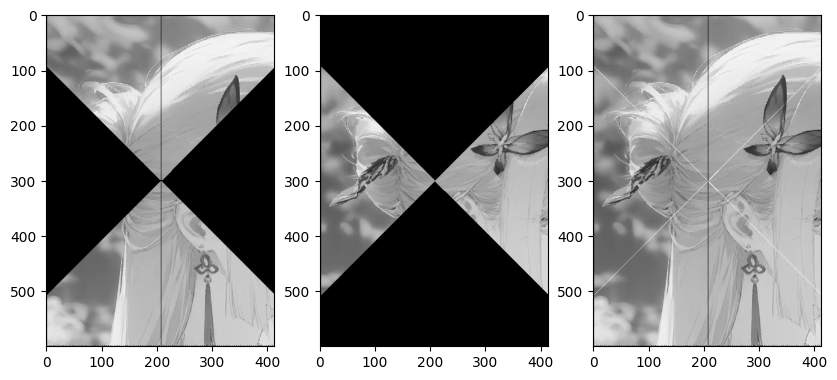

In [27]:
plt.figure(figsize=(10, 10))

plt.subplot(1, 3, 1)
a1 = hasil_trans[426:1026, 0:413]
plt.imshow(a1, cmap='gray')

plt.subplot(1, 3, 2)
a2 = translation(hasil_trans[0:600, 513:926], 87, 0)
plt.imshow(a2, cmap='gray')

plt.subplot(1, 3, 3)
a = cv2.add(a1.astype(np.uint8), a2.astype(np.uint8))
plt.imshow(a, cmap='gray')

Script tersebut membuat sebuah figure matplotlib dengan ukuran 10x10 inci menggunakan "plt.figure(figsize=(10, 10))". Selanjutnya, kode menggunakan subplot untuk menampilkan tiga gambar secara berurutan dalam satu baris dengan tiga kolom. Pada subplot pertama (subplot(1, 3, 1)), ditampilkan potongan gambar "a1" yang diambil dari hasil transformasi translasi sebelumnya (hasil_trans). Potongan ini mengambil bagian dari baris 426 hingga akhir (1026) dan dari kolom awal hingga 413. Pada subplot kedua (subplot(1, 3, 2)), dilakukan translasi terhadap potongan gambar dari hasil translasi sebelumnya, yaitu "hasil_trans", dengan mengambil potongan dari baris 0 hingga 600 dan dari kolom 513 hingga 926. Potongan ini kemudian diubah posisinya dengan translasi sebesar 87 piksel horizontal. Pada subplot ketiga (subplot(1, 3, 3)), potongan gambar "a1" dan "a2" digabungkan menggunakan fungsi "cv2.add()" dari library OpenCV (cv2), yang digunakan untuk melakukan penambahan elemen piksel antara kedua gambar. Hasil dari penambahan tersebut ditampilkan dalam mode skala abu-abu (cmap='gray')

In [28]:
mergeComp = []

### Semua Proses Rotasi dan Translasi Serta Penggabungan Citra Menjadi Beberapa Bagian

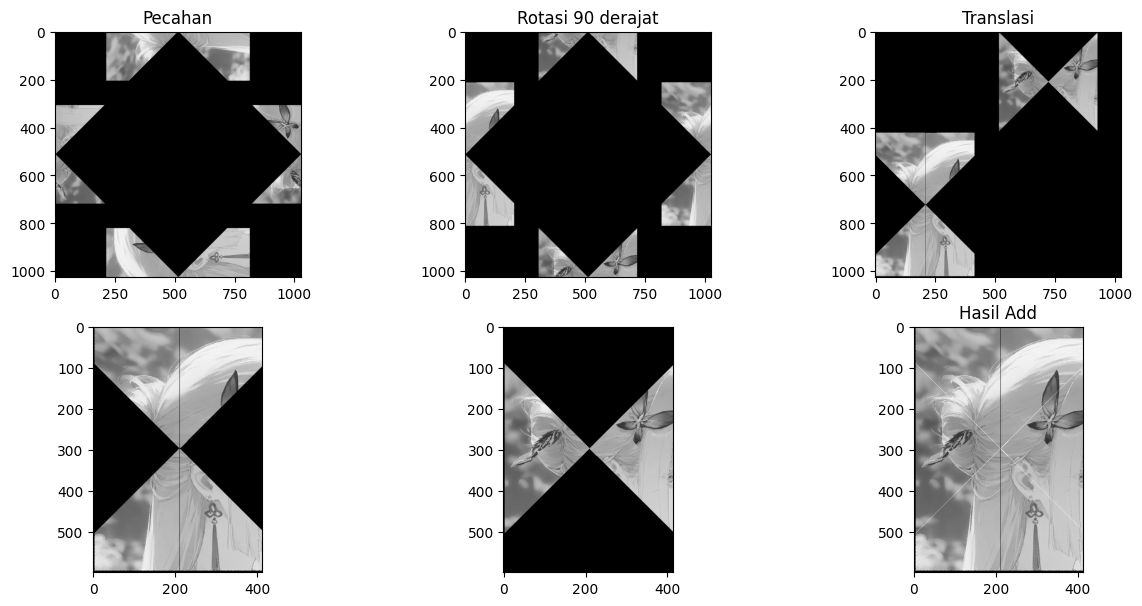

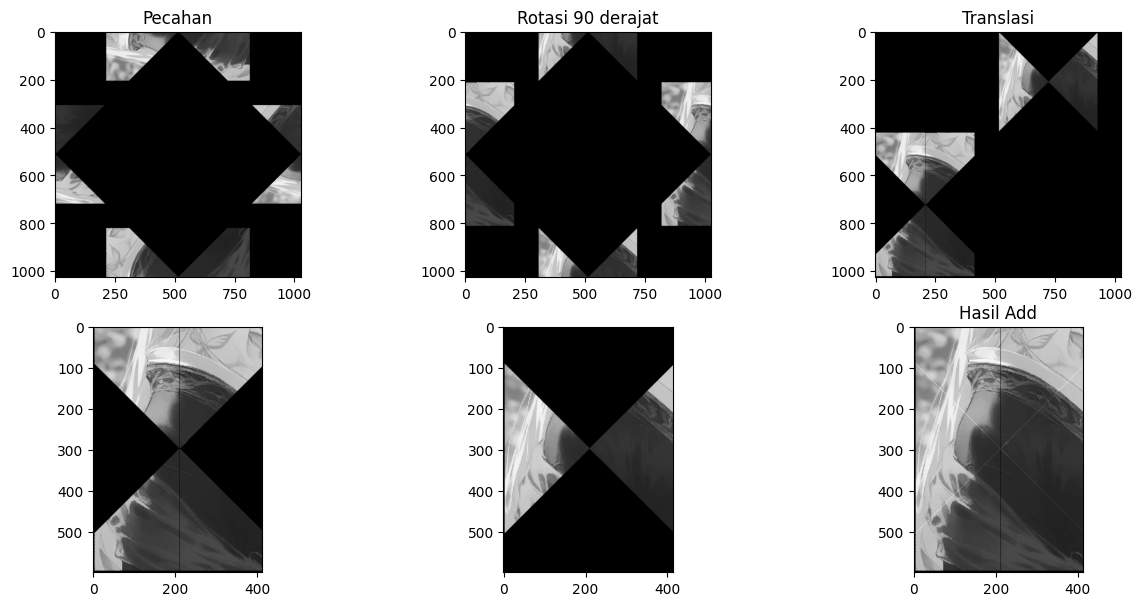

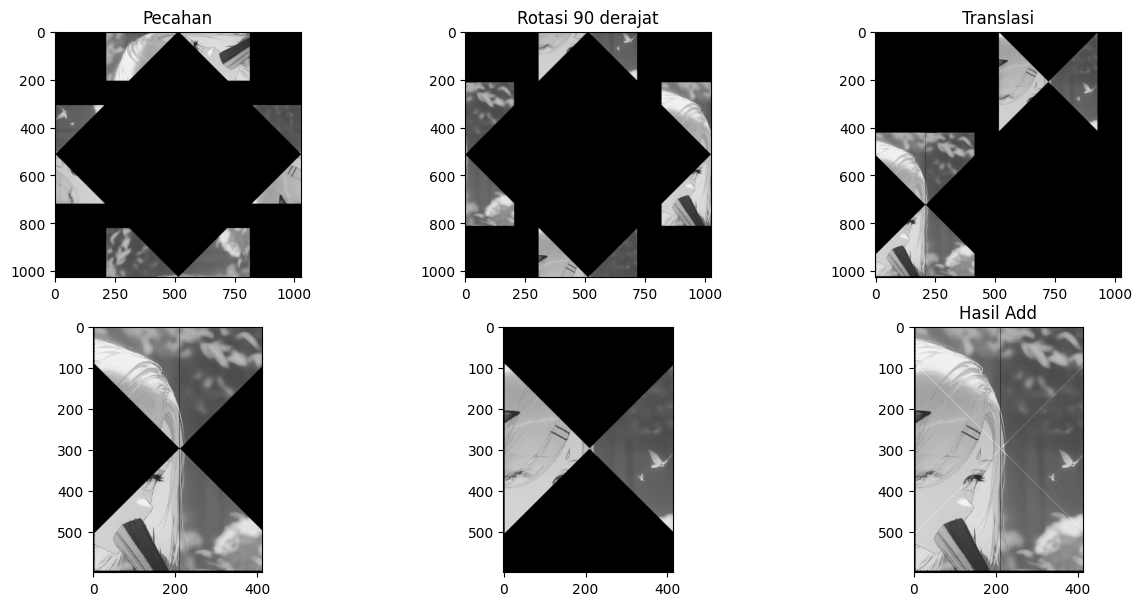

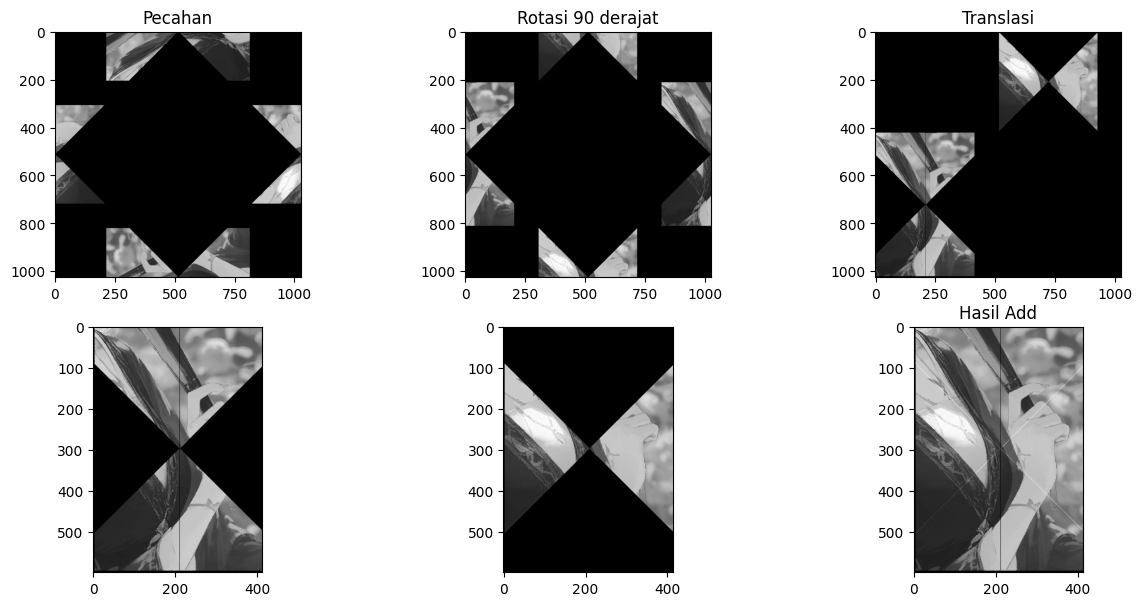

In [29]:
count = 1
for i in range(len(parts)):    
    plt.figure(figsize=(15, 30))

    plt.subplot(8, 3, count)
    plt.title('Pecahan')
    plt.imshow(parts[i], cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    plt.title('Rotasi 90 derajat')
    hasil_rotate = rotation(parts[i], 90)
    plt.imshow(hasil_rotate, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    plt.title('Translasi')
    hasil_trans = translation(hasil_rotate, 210, 210)
    plt.imshow(hasil_trans, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    KiriKanan = hasil_trans[426:1026, 0:413]
    plt.imshow(KiriKanan, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    AtasBawah = translation(hasil_trans[0:600, 513:926], 87, 0)
    plt.imshow(AtasBawah, cmap='gray')
    count+=1

    plt.subplot(8, 3, count)
    plt.title('Hasil Add')
    hasilAdd = cv2.add(KiriKanan.astype(np.uint8), AtasBawah.astype(np.uint8))
    plt.imshow(hasilAdd, cmap='gray')
    mergeComp.append(hasilAdd)
    count+=1

Script tersebut merupakan sebuah loop yang mengiterasi melalui setiap potongan gambar dalam list "parts". Setiap potongan gambar tersebut kemudian diolah dengan serangkaian transformasi yang termasuk rotasi dan translasi, serta dilakukan operasi penambahan piksel antara potongan-potongan tertentu. Pada setiap iterasi, sebuah figure baru dengan ukuran 15x30 inci dibuat, dan potongan gambar serta hasil transformasi dipetakan dalam bentuk subplot dengan judul yang relevan untuk memperjelas proses transformasi yang dilakukan. Kode ini menggunakan perhitungan "count" untuk mengatur posisi subplot pada setiap iterasi agar tata letak subplotnya tetap teratur. Hasil dari operasi transformasi dan penggabungan piksel kemudian disimpan dalam list "mergeComp" untuk digunakan lebih lanjut. Kode ini memvisualisasikan secara rinci serangkaian transformasi yang diterapkan pada setiap potongan gambar dalam "parts"

### Membuat Fungsi Merged untuk Menggabungkan Citra Menjadi Satu Gambar Utuh

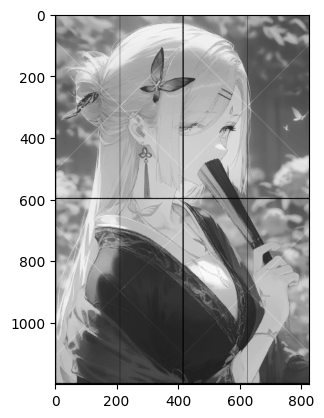

In [30]:
def mergeHorizontal(images):
    merged_height = images[0].shape[0]
    merged_width = sum(image.shape[1] for image in images)
    merged_image = np.zeros((merged_height, merged_width))
    
    currentCols = 0
    for image in images:
        merged_image[:, currentCols:currentCols+image.shape[1]] = image
        currentCols += image.shape[1]
        
    return merged_image

def mergeVertical(images):
    merged_width = images[0].shape[1]
    merged_height = sum(image.shape[0] for image in images)
    merged_image = np.zeros((merged_height, merged_width))
    
    currentRows = 0
    for image in images:
        merged_image[currentRows:currentRows+image.shape[0], :] = image
        currentRows += image.shape[0]
    
    return merged_image

row1 = mergeHorizontal([mergeComp[0], mergeComp[2]])
row2 = mergeHorizontal([mergeComp[1], mergeComp[3]])
merged_pic = mergeVertical([row1, row2])

# merged_pic.astype(int)
plt.imshow(merged_pic, cmap='gray')

Script tersebut mendefinisikan dua fungsi, yaitu "mergeHorizontal(images)" dan "mergeVertical(images)", yang digunakan untuk menggabungkan beberapa gambar secara horizontal dan vertikal, masing-masing. Fungsi "mergeHorizontal" mengambil sebuah list "images" yang berisi gambar-gambar dalam bentuk matriks numpy (array 2 dimensi) dan menggabungkannya secara horizontal. Proses penggabungan dilakukan dengan menghitung dimensi tinggi dan lebar dari gambar-gambar tersebut, membuat sebuah matriks kosong dengan ukuran yang memadai untuk menggabungkan gambar-gambar tersebut secara horizontal, dan kemudian mengisi matriks tersebut dengan gambar-gambar yang diberikan secara berurutan dari kiri ke kanan. Fungsi "mergeVertical" memiliki prinsip yang sama, namun proses penggabungan dilakukan secara vertikal dengan menggabungkan gambar-gambar dari atas ke bawah.

Pada script selanjutnya, dua baris gambar digabungkan secara horizontal menggunakan "mergeHorizontal" untuk membentuk "row1" dan "row2", dan kedua baris tersebut kemudian digabungkan secara vertikal menggunakan "mergeVertical" untuk membentuk "merged_pic". Hasil penggabungan ini adalah gabungan dari empat potongan gambar yang telah melalui serangkaian transformasi sebelumnya, yang kemudian ditampilkan menggunakan "plt.imshow()" dalam mode skala abu-abu (cmap='gray'). Proses ini memungkinkan visualisasi dari hasil transformasi dan penggabungan gambar-gambar tersebut menjadi satu gambar utuh yang kompleks.

## 2. Ekualisasi Terhadap Citra Hasil

### Proses Ekualisasi dan Perbandingan Histogram

Text(0.5, 1.0, 'Histogram Hasil Ekualisasi')

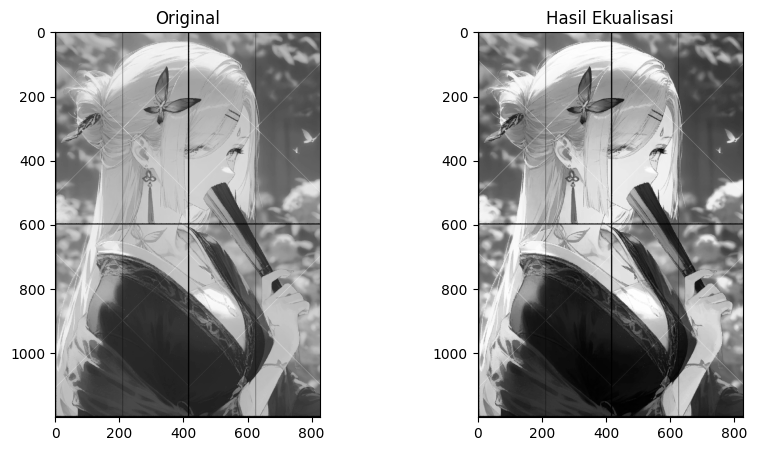

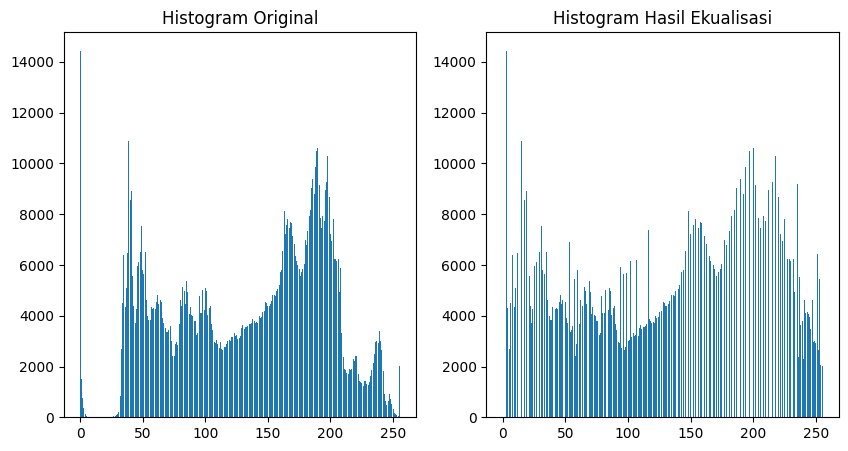

In [31]:
def equalization(image):
    hist = np.zeros(256, dtype=int)
    height, width = image.shape
    for i in range(height):
        for j in range(width):
            pixel_value = int(image[i, j])
            hist[pixel_value] += 1
    
    cdf = np.zeros(256, dtype=int)
    for i in range(256):
        cdf[i] = np.sum(hist[0:i+1])
    
    totalPixels = height*width
    targetValues = (cdf*(256-1)) / totalPixels
    targetValues = np.floor(targetValues).astype(int)

    hasil = np.zeros(image.shape)
    for i in range(height):
        for j in range(width):
            hasil[i, j] = targetValues[int(image[i, j])]
    
    return hasil

def histogram(image, lv):
    grayValue = [i for i in range(lv)] 
    sumGray = np.zeros(lv, dtype=int)
    height, width = image.shape    
    for i in range(height): 
        for j in range(width): 
            sumGray[int(image[i,j])] += 1  
    plt.bar(grayValue, sumGray)

imageEqu = equalization(merged_pic)

plt.figure(figsize=(10,5)) 
plt.subplot(1, 2, 1)
plt.imshow(merged_pic, cmap='gray')
plt.title('Original')
plt.subplot(1, 2, 2)
plt.imshow(imageEqu, cmap='gray')
plt.title('Hasil Ekualisasi')

plt.figure(figsize=(10,5)) 
plt.subplot(121)
histogram(merged_pic,256)
plt.title('Histogram Original')
plt.subplot(122)
histogram(imageEqu,256)
plt.title('Histogram Hasil Ekualisasi')

Fungsi "equalization(image)" digunakan untuk melakukan proses ekualisasi histogram pada gambar grayscale. Pertama, fungsi menghitung histogram gambar asli dengan menghitung frekuensi kemunculan setiap nilai piksel (0-255) dan menyimpannya dalam array "hist". Selanjutnya, fungsi menghitung cumulative distribution function (CDF) dari histogram yang telah dihitung sebelumnya, kemudian menghitung nilai target baru untuk setiap nilai piksel menggunakan formula ekualisasi histogram. Proses ini menghasilkan matriks baru yang merupakan gambar hasil ekualisasi, di mana setiap nilai piksel pada gambar baru diperoleh dari nilai target yang sesuai dengan nilai piksel asli pada gambar asli.

Fungsi "histogram(image, lv)" digunakan untuk menghitung dan menampilkan histogram dari gambar grayscale. Fungsi ini menghitung jumlah kemunculan setiap nilai piksel pada gambar dan menampilkannya dalam bentuk histogram menggunakan "plt.bar()".

Pada kode selanjutnya, gambar awal (merged_pic) ditampilkan bersama dengan gambar hasil ekualisasi (imageEqu) dalam subplot dengan judul yang relevan. Selain itu, histogram gambar asli dan hasil ekualisasi juga ditampilkan dalam subplot terpisah untuk membandingkan distribusi nilai piksel sebelum dan setelah proses ekualisasi histogram. Hal ini membantu memvisualisasikan efek dari proses ekualisasi histogram terhadap distribusi nilai piksel dalam gambar.

## 3. Spesifikasi Citra Terhadap Gambar Target

### Proses Spesifikasi dengan Mendefinisikan Kedua Gambar Target

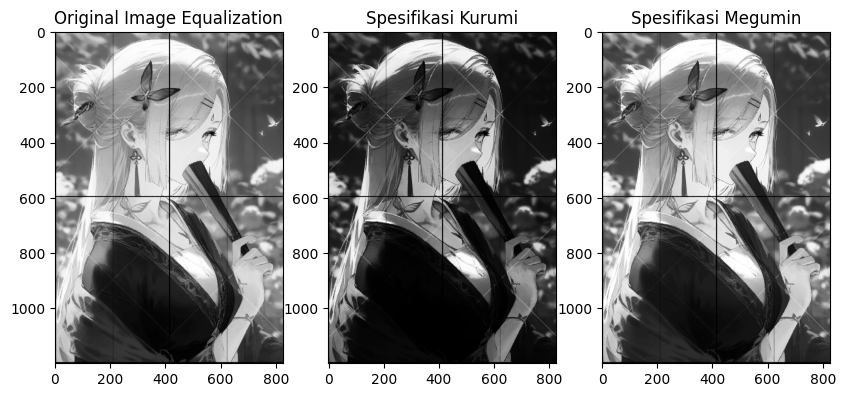

In [32]:
def spec_hist(source_image, target_image):
    hist_source = np.zeros(256, dtype=int)
    height_source, width_source = source_image.shape
    for i in range(height_source):
        for j in range(width_source):
            pixel_value_source = int(source_image[i, j])
            hist_source[pixel_value_source] += 1
    
    hist_target = np.zeros(256, dtype=int)
    height_target, width_target = target_image.shape
    for i in range(height_target):
        for j in range(width_target):
            pixel_value_target = int(target_image[i, j])
            hist_target[pixel_value_target] += 1
    
    cdf_target = np.cumsum(hist_target)
    
    mapping = np.zeros(256, dtype=int)
    for i in range(256):
        mapping[i] = np.argmin(np.abs(cdf_target - np.sum(hist_source[0:i+1])))
    
    result_image = np.zeros(source_image.shape)
    for i in range(height_source):
        for j in range(width_source):
            result_image[i, j] = mapping[int(source_image[i, j])]
    
    return result_image

ref_img1 = plt.imread('res/kurumi.jpg')
target1_gray = cv2.cvtColor(ref_img1, cv2.COLOR_RGB2GRAY)
ref_img2 = plt.imread('res/megumin.jpg')
target2_gray = cv2.cvtColor(ref_img2, cv2.COLOR_RGB2GRAY)

output_img1 = spec_hist(imageEqu, target1_gray)
output_img2 = spec_hist(imageEqu, target2_gray)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(imageEqu, cmap='gray')
plt.title('Original Image Equalization')

plt.subplot(1, 3, 2)
plt.imshow(output_img1, cmap='gray')
plt.title('Spesifikasi Kurumi')

plt.subplot(1, 3, 3)
plt.imshow(output_img2, cmap='gray')
plt.title('Spesifikasi Megumin')

plt.show()

Fungsi "spec_hist(source_image, target_image)" mengimplementasikan proses spesifikasi histogram untuk menyamakan histogram gambar sumber (source_image) dengan histogram gambar target (target_image). Proses ini dilakukan dengan menghitung histogram dari kedua gambar tersebut dan mencari nilai pemetaan (mapping) yang memungkinkan gambar sumber memiliki histogram yang mirip dengan histogram gambar target. Proses ini termasuk tahapan menghitung CDF dari histogram gambar target, dan kemudian mencari nilai pemetaan yang paling mendekati untuk setiap nilai piksel pada gambar sumber sehingga histogramnya sesuai dengan histogram gambar target.

Pada kode selanjutnya, dua gambar referensi grayscale (target1_gray dan target2_gray) diambil dan digunakan sebagai gambar target untuk dua gambar hasil ekualisasi (imageEqu). Fungsi "spec_hist" kemudian diterapkan untuk menghasilkan gambar keluaran yang telah disesuaikan histogramnya dengan masing-masing gambar target. Hasil dari proses spesifikasi histogram ini ditampilkan dalam tiga subplot yang menampilkan gambar asli setelah ekualisasi histogram (imageEqu) bersama dengan dua gambar keluaran yang telah disesuaikan histogramnya dengan gambar target yang berbeda. Hal ini memungkinkan untuk melihat perbedaan hasil dari proses spesifikasi histogram terhadap gambar awal yang telah diekualisasi.

## 4. Pemecahan Citra dan Spesifikasi Setiap Bagian

### Proses Pemecahan Citra dan Hasil Spesifikasi Setiap Bagian

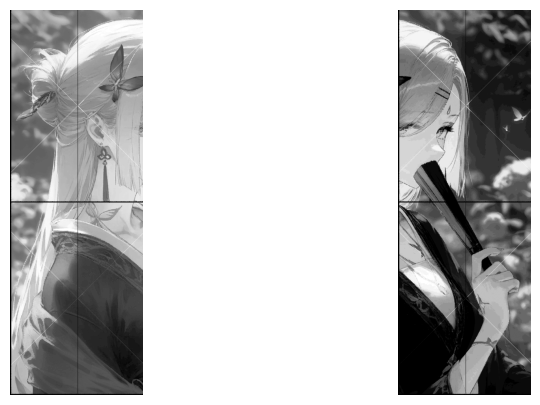

<Figure size 1000x500 with 0 Axes>

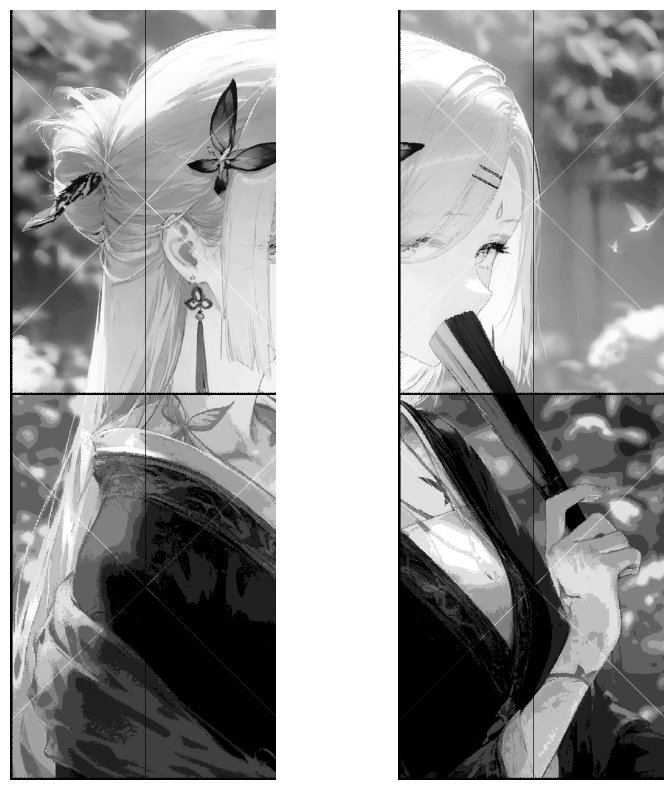

<Figure size 1000x500 with 0 Axes>

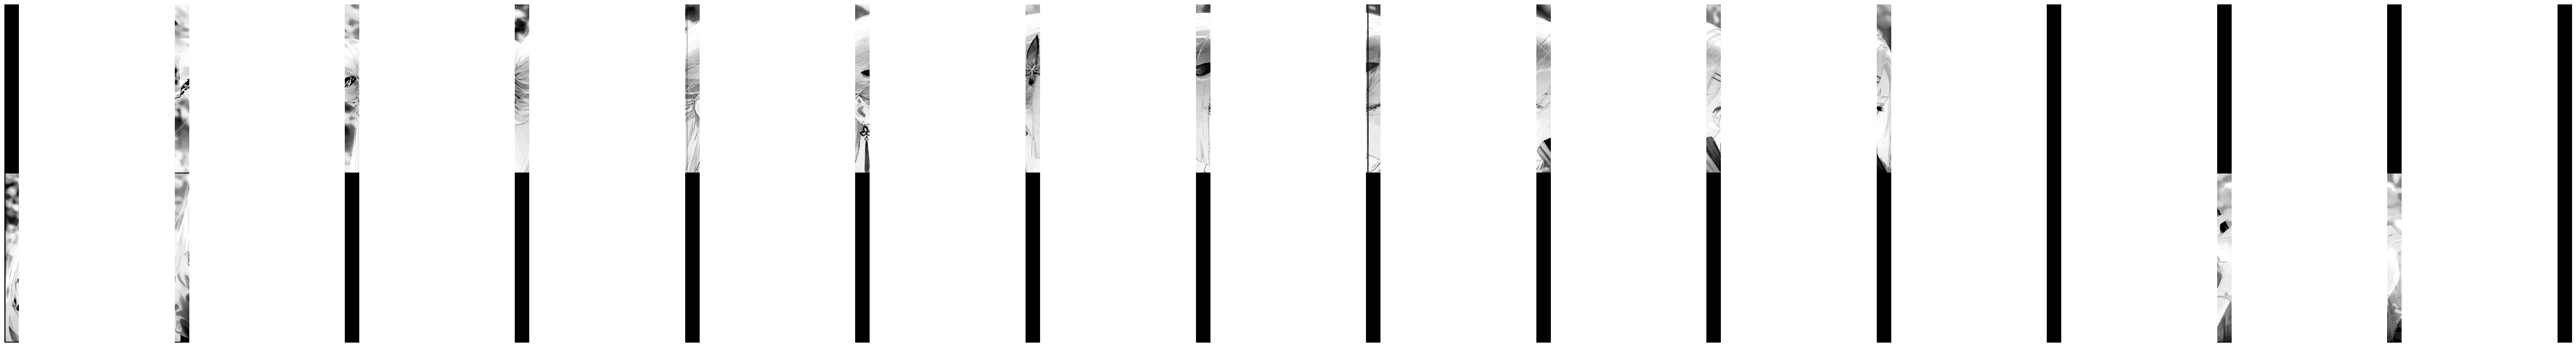

<Figure size 1000x500 with 0 Axes>

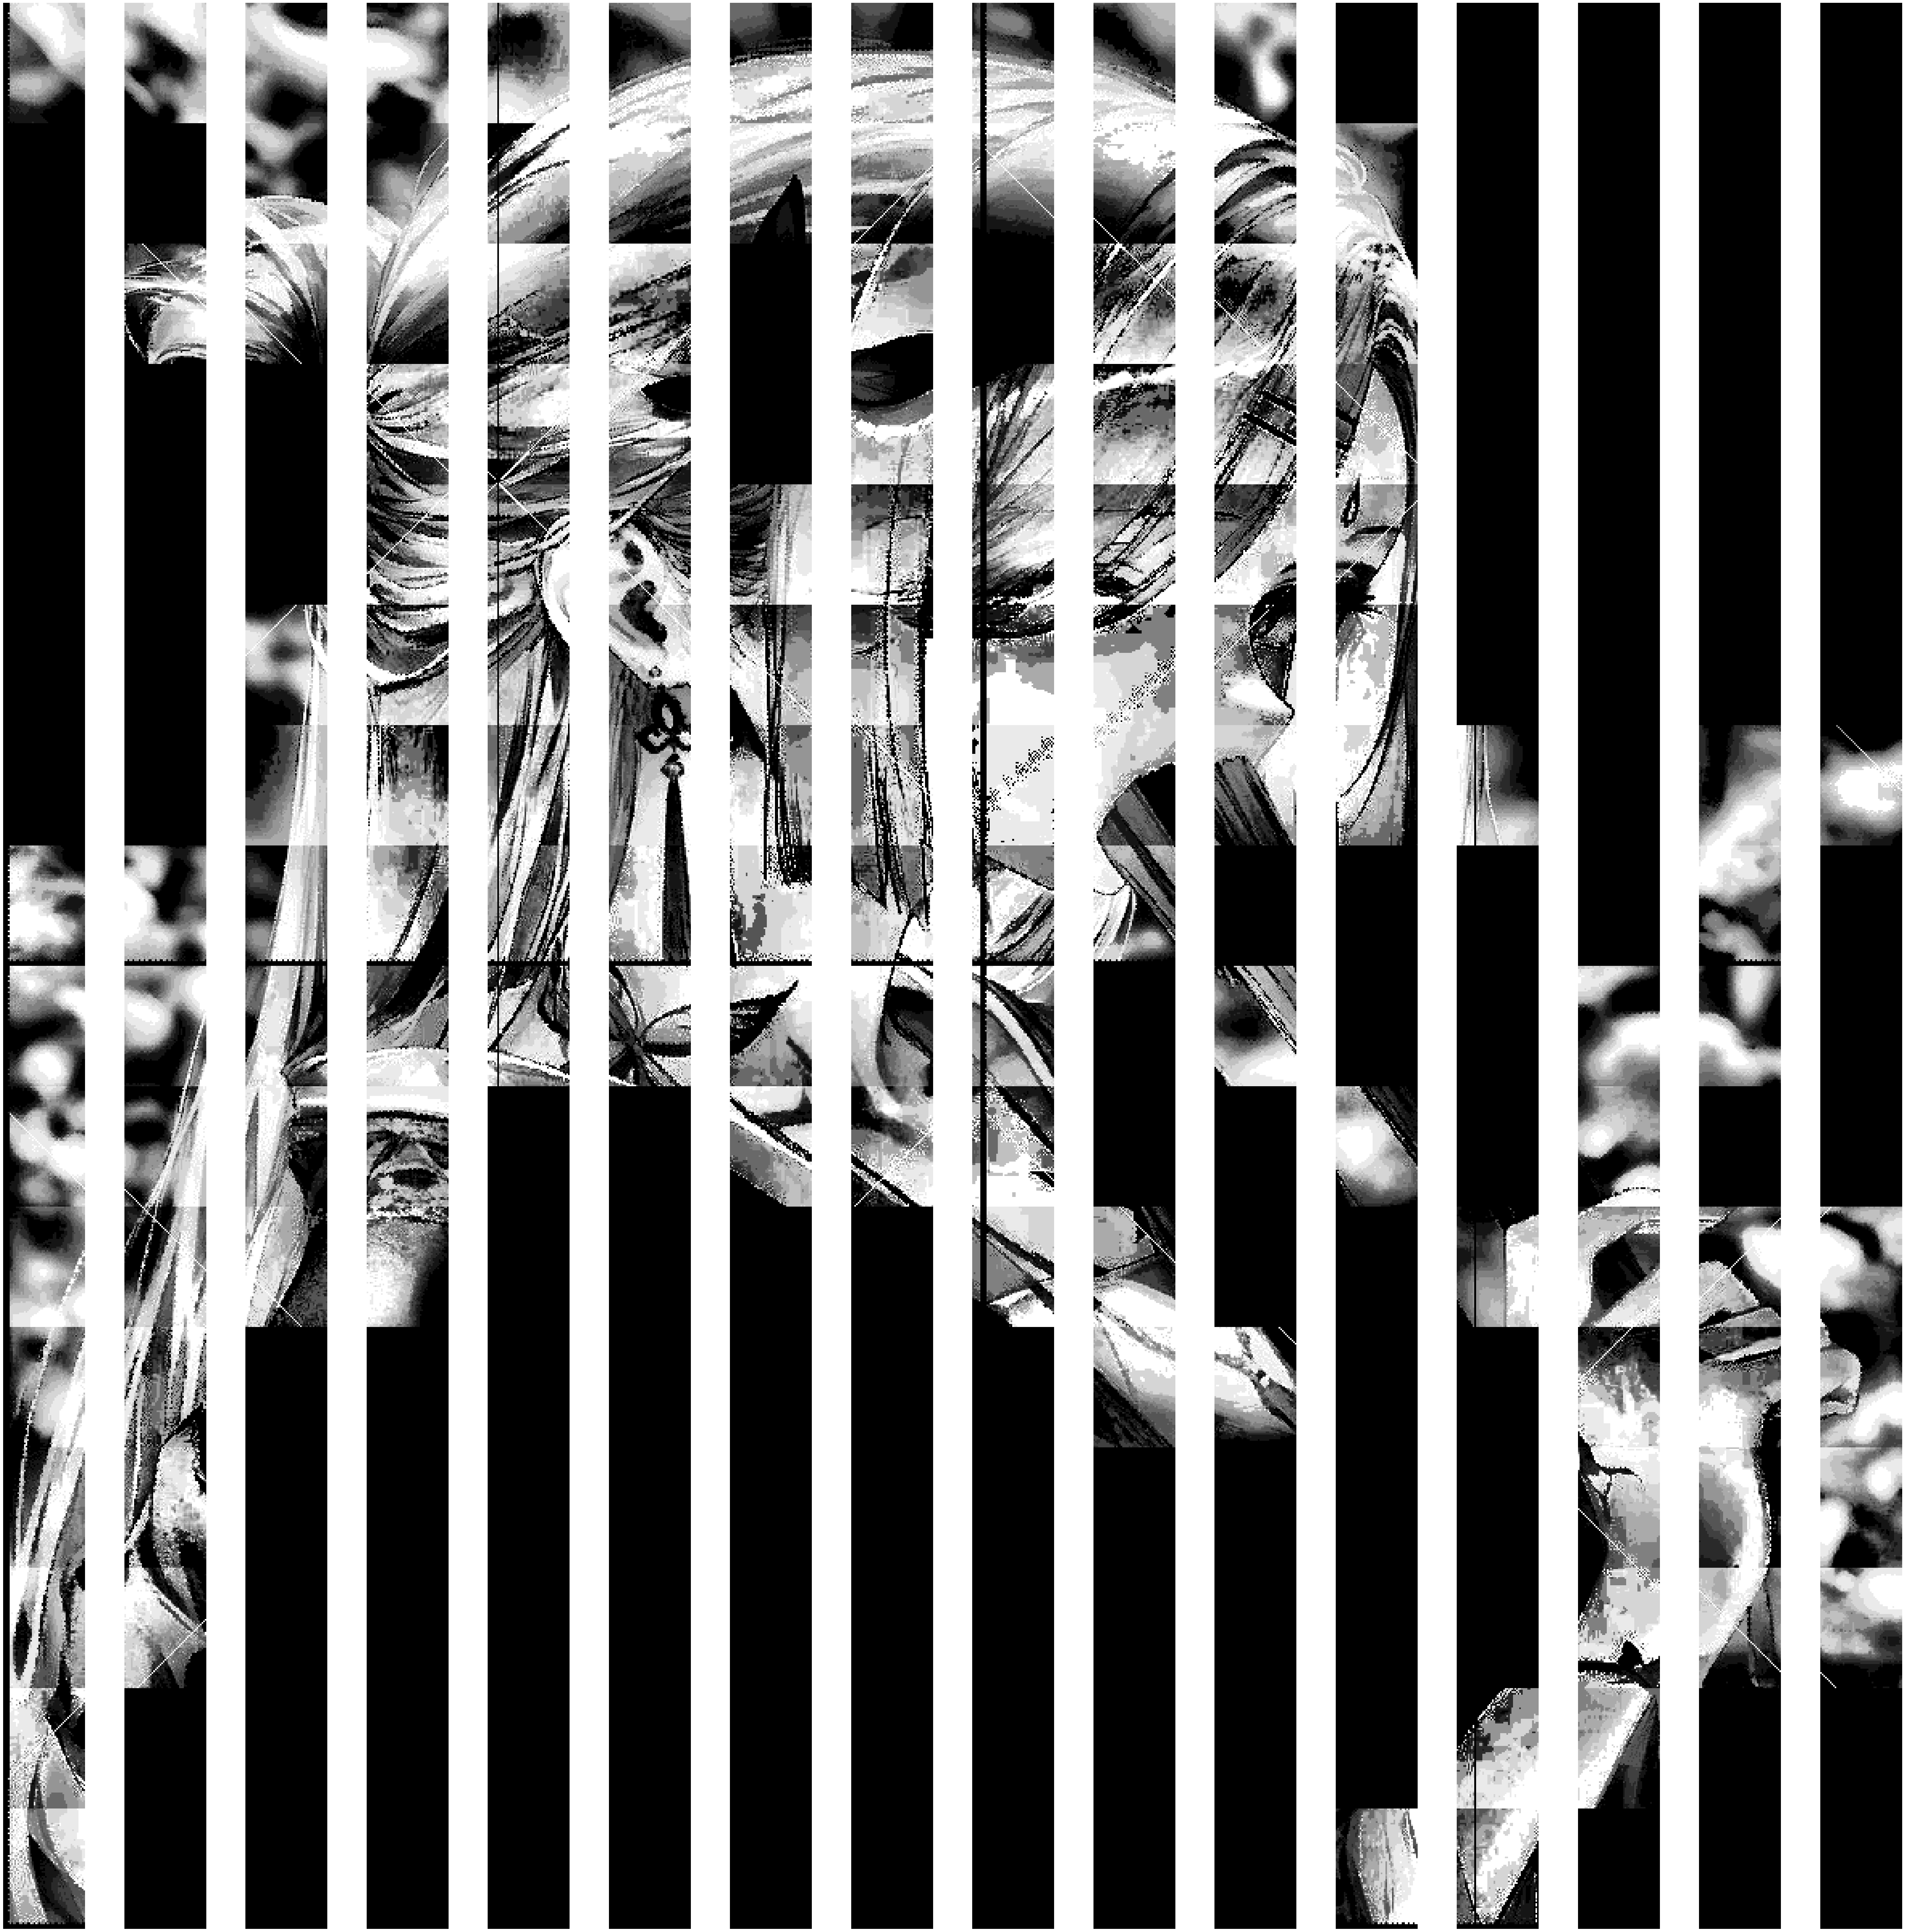

<Figure size 1000x500 with 0 Axes>

In [37]:
def split_and_specify(img, target1, target2, rows, cols):
    h, w = img.shape
    h_step, w_step = h // rows, w // cols
    result_images = []
    for i in range(rows):
        for j in range(cols):
            part = img[i*h_step:(i+1)*h_step, j*w_step:(j+1)*w_step]
            if np.mean(part) <= 128:
                target = target1
            else:
                target = target2 
            matched = spec_hist(part, target)
            result_images.append(matched)
    return result_images

target1 = cv2.imread('res/kurumi.jpg', 0)
target2 = cv2.imread('res\megumin.jpg', 0)

combinations = [(1, 2), (2, 2), (2, 16), (16, 16)]
for rows, cols in combinations:
    result_images = split_and_specify(imageEqu, target1_gray, target2_gray, rows, cols)
    fig, axs = plt.subplots(rows, cols, figsize=(5*cols, 5*rows, ))
    plt.subplots_adjust(wspace=0, hspace=0)
    for i, ax in enumerate(axs.flatten()):
        ax.imshow(result_images[i], cmap='gray')
        ax.axis('off') 
    
    plt.figure(figsize=(10, 5))
    plt.show()

Script tersebut mengimplementasikan fungsi "split_and_specify" yang membagi gambar menjadi potongan-potongan berdasarkan jumlah baris (rows) dan kolom (cols) yang ditentukan, lalu mengaplikasikan proses spesifikasi histogram pada setiap potongan gambar berdasarkan nilai rata-rata piksel di dalam potongan tersebut. Proses ini menghasilkan "result_images" yang berisi potongan-potongan gambar dengan histogram yang disesuaikan dengan gambar target yang dipilih.

Selanjutnya, dalam loop kombinasi, kode menggunakan "split_and_specify" untuk menghasilkan potongan-potongan gambar yang disesuaikan histogramnya dengan gambar target (target1 dan target2). Setiap kombinasi jumlah baris dan kolom memberikan tampilan subplot dengan ukuran yang berbeda, di mana potongan-potongan gambar tersebut ditampilkan tanpa jarak antara potongan gambar menggunakan "plt.subplots_adjust(wspace=0, hspace=0)". Hal ini memungkinkan untuk membandingkan hasil spesifikasi histogram pada potongan-potongan gambar dengan ukuran yang berbeda secara visual dalam satu tampilan.

## 5. Analisis dan simpulkan apa yang bisa di dapat dari melakukan spesifikasi terhadap segmentasi citra

1. Penyesuaian Kontras: Spesifikasi histogram memungkinkan untuk menyesuaikan kontras pada bagian-bagian tertentu dari gambar. Misalnya, dapat meningkatkan kontras pada area yang memiliki tingkat kecerahan yang rendah atau meningkatkan detail pada area tertentu.
2. Penekanan Fitur Tertentu: Dengan melakukan spesifikasi histogram, dapat menekankan fitur-fitur khusus dalam citra yang ingin diperjelas. Misalnya, dalam citra medis, dapat menekankan daerah tertentu seperti tumor atau struktur penting lainnya untuk analisis yang lebih baik.
3. Peningkatan Detail: Teknik ini juga dapat digunakan untuk meningkatkan detail pada gambar, terutama pada area dengan kontras rendah atau detail yang kurang terlihat. 
4. Pembandingan Visual: Dengan melakukan spesifikasi histogram pada potongan-potongan citra (segmentasi), dapat membandingkan efek dari berbagai teknik atau parameter pada bagian-bagian tertentu dari gambar. Hal ini memungkinkan analisis yang lebih mendalam tentang bagaimana teknik pengolahan gambar memengaruhi citra dalam konteks spesifik.